<a href="https://colab.research.google.com/github/supriyasri/PYTHON-MANIA-/blob/master/simpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline     

In [0]:
from sklearn import datasets, linear_model                     # predefined functions are imported here 
from sklearn.linear_model import LinearRegression,Ridge,Lasso  #output is numeric-go with regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score      # r2 is the difference between predicted and actual one
from sklearn.datasets import load_boston       
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge

In [0]:
a=pandas.read_csv('C:\\Users\HP\Data Science\Pandas\india_climate6.csv')
a

,date,temperature,windspeed,event
0,1/1/2019,32c,6mph,Rainy
1,1/2/2019,-99999,7,Sunny
2,1/3/2019,26,-99999,No event
3,1/4/2019,38f,5,Sunny
4,1/5/2019,-88888,-99999,Snow
5,1/6/2019,20,4,No event
6,1/7/2019,34,8,Sunny


In [0]:
regression_data = pandas.read_csv('C:\\Users\HP\Data Science\Pandas\simpleLR.csv')
regression_data

,Volume,Price
0,4.690628,27.000389
1,4.235716,24.925126
2,4.626838,20.931068
3,6.166307,31.296321
4,3.433759,17.315909
5,5.945953,34.816306
6,4.632415,15.999182
7,3.959437,25.061199
8,3.923685,23.585337
9,5.605697,31.889041


In [0]:
regression_data.head()

,Volume,Price
0,4.690628,27.000389
1,4.235716,24.925126
2,4.626838,20.931068
3,6.166307,31.296321
4,3.433759,17.315909


Text(0.5, 1.0, 'Price-Volume Data')

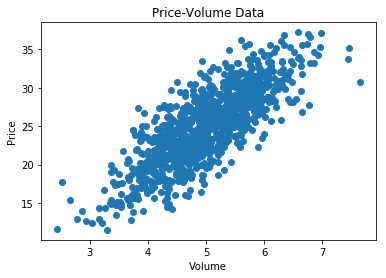

In [0]:
plt.scatter(regression_data['Volume'],regression_data['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Price-Volume Data')

In [0]:
from pylab import rcParams
rcParams['figure.figsize']=10,8




Text(0.5, 1.0, 'Price- Volume Data')

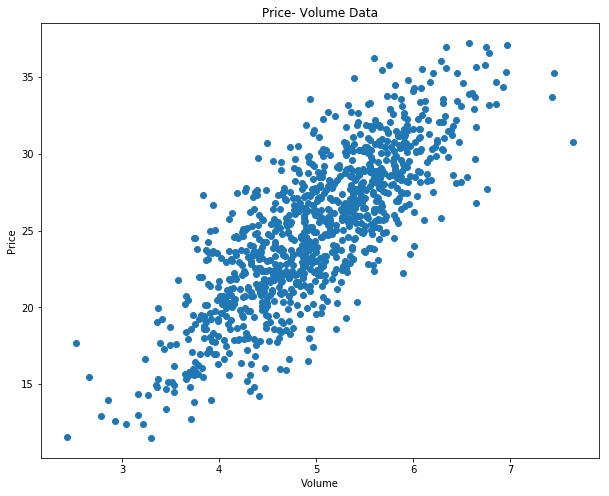

In [0]:
plt.scatter(regression_data['Volume'],regression_data['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Price- Volume Data')

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(regression_data['Volume'],regression_data['Price'],test_size=0.20)

In [0]:
X_train

987    5.562429
505    4.703143
502    4.595208
50     5.625858
952    5.500768
615    4.667784
677    5.684179
331    6.301191
430    3.356153
456    3.676000
258    5.404743
337    5.742691
228    4.748923
947    6.095762
834    6.070434
920    6.064862
746    4.153636
716    5.250649
506    4.352447
844    5.963033
112    5.906196
837    4.851083
740    5.889475
356    3.359659
325    4.787276
71     4.610869
815    4.031413
389    4.964745
954    3.832794
846    4.641164
         ...   
197    5.070131
132    3.348369
414    5.952295
749    4.038241
609    4.619565
789    5.584037
971    3.924166
16     5.125223
289    3.750654
100    4.421473
254    6.496554
48     5.383644
649    5.225152
217    5.050086
277    4.161477
405    4.276160
311    5.507833
271    4.245394
34     5.868277
753    2.521346
10     5.024371
590    6.058247
286    4.871952
795    5.189364
560    5.000057
259    4.690615
963    4.295163
201    4.354431
980    4.549867
24     5.000100
Name: Volume, Length: 80

In [0]:
Y_train

987    23.849511
505    25.295014
502    17.756161
50     28.487263
952    30.467992
615    20.967217
677    28.932018
331    32.047360
430    19.040139
456    15.543144
258    26.580883
337    31.381670
228    22.396689
947    32.548973
834    28.817848
920    31.589289
746    24.593638
716    28.536812
506    23.973675
844    29.550970
112    31.067543
837    26.498535
740    28.902864
356    14.801247
325    22.084316
71     27.329619
815    19.659942
389    20.212690
954    15.478300
846    23.836693
         ...    
197    22.714243
132    14.960091
414    31.524346
749    20.718414
609    18.513298
789    31.779673
971    23.546402
16     32.743237
289    24.483752
100    23.661384
254    33.102030
48     30.166573
649    26.882364
217    27.149098
277    20.530973
405    18.300230
311    23.613599
271    19.382976
34     30.370368
753    17.698655
10     28.839021
590    31.049750
286    22.220210
795    28.036818
560    19.540716
259    25.821041
963    21.193211
201    23.4407

In [0]:
Y_test

659    31.165278
907    23.680881
137    11.496964
210    29.642079
301    32.941011
326    29.183500
222    18.745043
17     22.750433
958    36.927155
904    25.013659
504    32.443011
783    29.217744
623    28.878196
528    34.447611
868    24.580392
340    28.239718
298    26.531569
320    26.262721
598    29.166378
624    27.182258
163    18.281730
110    21.195647
806    30.749018
840    24.797169
93     15.939032
231    25.065030
681    23.845454
81     24.222370
36     24.508991
927    26.450628
         ...    
114    22.387320
474    17.640443
214    30.235793
752    28.862122
274    22.168943
206    25.923049
83     20.394478
303    23.679928
358    27.501303
413    29.873107
855    25.403311
53     31.868201
819    28.548949
563    20.659397
55     25.832510
899    12.623527
585    21.714638
70     19.604619
294    25.154674
67     23.343070
913    28.142438
265    27.127850
158    31.377796
196    27.958474
568    30.602640
407    18.321270
28     27.443584
547    21.3337

In [0]:
simple_linear_regression=LinearRegression()

X_train=X_train.values
X_test=X_test.values
Y_train=Y_train.values
simple_linear_regression.fit(pandas.DataFrame(X_train),pandas.DataFrame(Y_train))
Y_pred=simple_linear_regression.predict(pandas.DataFrame(X_test))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [0]:
print("Mean squared error: %.1f" %mean_squared_error(Y_test,Y_pred))

Mean squared error: 8.9


In [0]:
print('R2 score: %.2f' %r2_score(Y_test,Y_pred))

R2 score: 0.66


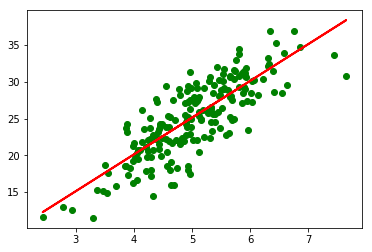

In [0]:
plt.scatter(X_test,Y_test,color='green')
plt.plot(X_test,Y_pred,color='red',linewidth=2)
